In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

plt.style.use('seaborn')

You are free to choose the dataset within the following constraints :
* utf-8 encoded in a `data.csv` file
* several hundreds of lines
* at least 6 attributes (columns), the first being a unique id, separated by commas
* you may use some categorical (non quantitative) features.
* some fields should be correlated

If necessary, you can tweak a dataset in order to artificially make it possible to
apply analysis ans visualization techniques.

In [62]:
df = pd.read_csv("./data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The file analysis.py presents a quick analysis of the dataset. For instance :
* Histograms of quantitative variables with a comment on important statistical aspects, such as means , standard deviations , etc.
* A study of potential outliers
* Correlation matrices (maybe not for all variables)
* Any interesting analysis : if you have categorical data, with categories are represented most ? To what extent ?

In [71]:
# normalize column names

df.columns = df.columns.str.lower()
df.head()

# drop lines with missing values
print(df.shape)
df = df.dropna()
print(df.shape)
df.head()

(5110, 12)
(4909, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Plot distribution of each column

We use the raw dataset because it has better visibility for binary/categorical variables.
We don't plot the id as it doesn't make sense.

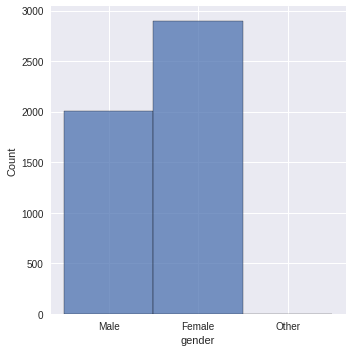

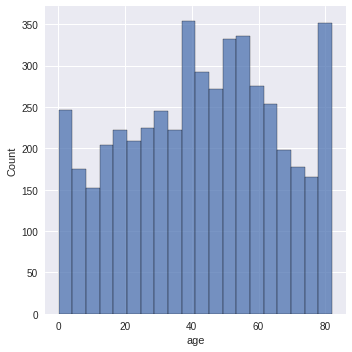

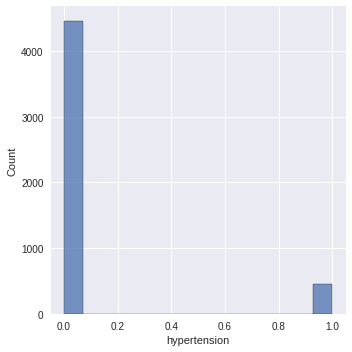

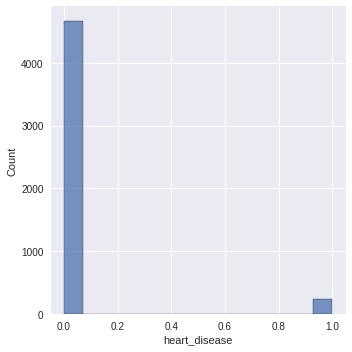

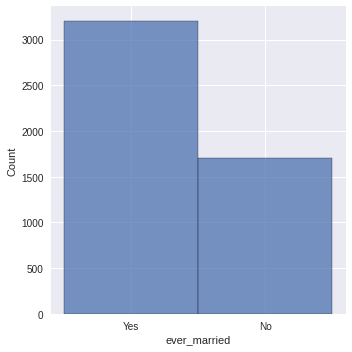

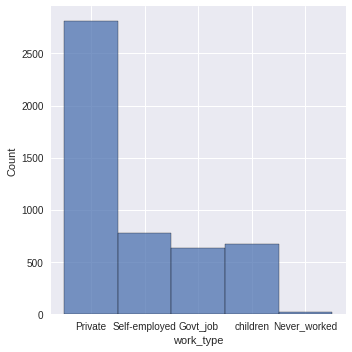

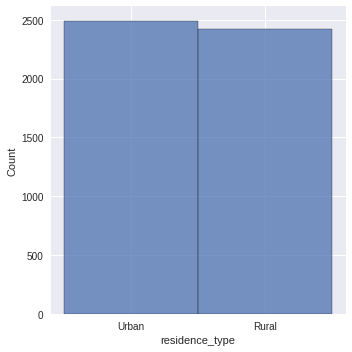

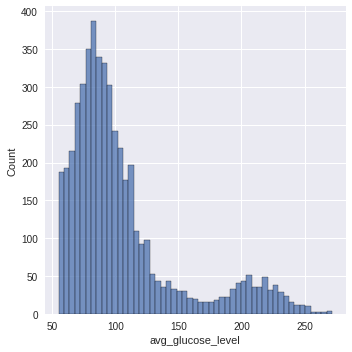

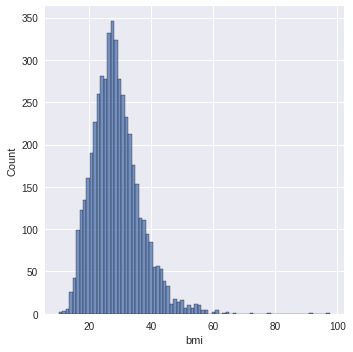

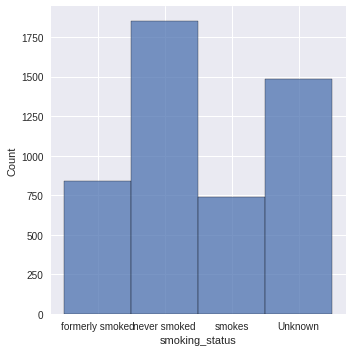

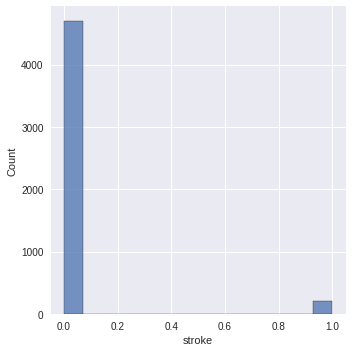

In [52]:
import seaborn as sns

# plot distribution of each column

for col in df.columns[1:]:
    sns.displot(df, x=col)

In [53]:
# compute mean & stddev for each column

numeric_cols = ['age', 'bmi', 'avg_glucose_level']

for col in numeric_cols:
    mean = df[col].mean()
    stdev = df[col].std()
    print(f'{col}\tmean: {mean:.2f}\tstdev: {stdev:.2f}')

age	mean: 42.87	stdev: 22.56
bmi	mean: 28.89	stdev: 7.85
avg_glucose_level	mean: 105.31	stdev: 44.42


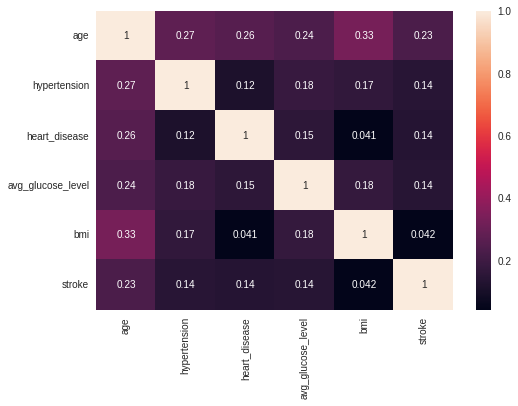

In [54]:
corr_matrix = df[df.columns[1:]].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Data processing

In [72]:
# save raw data
df_raw = df.copy()

In [85]:
# load raw data
df = df_raw.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [86]:
# one-hot for categorical variables:
categorical_cols = ['gender', 'work_type', 'smoking_status']

for col in categorical_cols:
    if col not in df.columns:
        continue
    dummies = pd.get_dummies(df[col])
    df = pd.concat((df, dummies), axis=1)
    df.drop(col, axis=1, inplace=True)

df.head()

,id,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,stroke,Female,...,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,Yes,Urban,228.69,36.6,1,0,...,0,0,0,1,0,0,0,1,0,0
2,31112,80.0,0,1,Yes,Rural,105.92,32.5,1,0,...,0,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,Yes,Urban,171.23,34.4,1,1,...,0,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,Yes,Rural,174.12,24.0,1,1,...,0,0,0,0,1,0,0,0,1,0
5,56669,81.0,0,0,Yes,Urban,186.21,29.0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [87]:
# binarize binary data

binary_col_mapping = {
    'ever_married': {'No': 0, 'Yes': 1},
    'residence_type': {'Rural': 0, 'Urban': 1}
}

for (col, mapping) in binary_col_mapping.items():
    if col not in df.columns:
        continue
    df[col] = df[col].map(mapping)

df.head()

,id,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,stroke,Female,...,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,0,...,0,0,0,1,0,0,0,1,0,0
2,31112,80.0,0,1,1,0,105.92,32.5,1,0,...,0,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,1,1,171.23,34.4,1,1,...,0,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,1,0,174.12,24.0,1,1,...,0,0,0,0,1,0,0,0,1,0
5,56669,81.0,0,0,1,1,186.21,29.0,1,0,...,0,0,0,1,0,0,0,1,0,0
